In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# We need to do time & space-optimisation

In [3]:
# We should store int data instead of string to save space, 4Bytes vs 8Bytes

In [4]:
# 1Kb of space reults in lot of data_space

In [5]:
X_data = []
Y_data = []

for i in range(777):
    point = np.random.randint(5, 99, 2) 
    X_data.append(point)
    Y_data.append(np.zeros(1))

for i in range(777):
    point = np.random.randint(129, 250, 2)
    X_data.append(point)
    Y_data.append(np.ones(1))

In [6]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

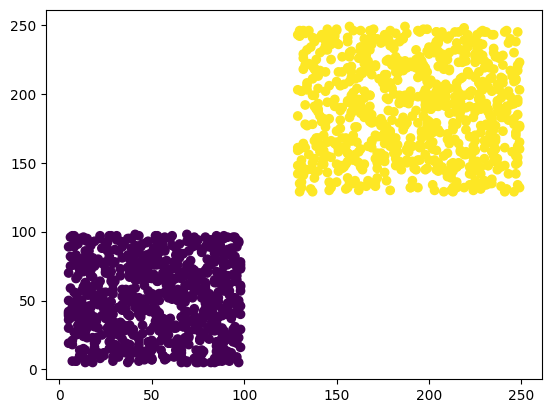

In [7]:
plt.scatter(X_data[:, 0], X_data[:, 1], c = Y_data)  # Because of c, we are getting different colors

In [8]:
X_data

array([[ 93,  88],
       [ 89,  63],
       [ 29,  55],
       ...,
       [158, 231],
       [165, 240],
       [152, 148]])

**Shuffling X_data, Y_data**

In [9]:
from sklearn.utils import shuffle

In [10]:
X_data, Y_data = shuffle(X_data, Y_data, random_state = 100)

In [11]:
X_data

array([[ 68,  39],
       [129, 142],
       [ 70,  62],
       ...,
       [ 29,   9],
       [204, 245],
       [238, 190]])

In [12]:
Y_data

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [13]:
split = 0.8

train_X = X_data[:int(split * X_data.shape[0]), :]
train_Y = Y_data[:int(split * Y_data.shape[0])]
test_X = X_data[int(split * X_data.shape[0]):, :]
test_Y = Y_data[int(split * Y_data.shape[0]):]

In [14]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(1243, 2) (1243, 1) (311, 2) (311, 1)


In [15]:
import numpy as np

class KNN_classifier:
    # Define K
    def __init__(self, k=5):
        self.k = k

    # Initialise dataset
    def initialise_data(self, X, Y):
        self.X = X
        self.Y = Y

    def distance_formula(self, point1, point2):
        # sqrt((x2-x1)^2 + (y2-y1)^2)
        return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) ** 0.5

    def predict(self, test_point):
        # No training is done in KNN, Prediction is done directly
        distance = []
        for i in range(self.X.shape[0]):
            # Appending distance between every point
            distance.append((self.distance_formula(test_point, self.X[i]), self.Y[i]))
             # self.X[i] represent the label of neighbor points
             # self.Y[i] represent the vote -> redLabel or blueLabel

        # Sorting distances
        distance = sorted(distance)

        # Getting nearest K distances
        distance = distance[:self.k]

        # Now doing voting
        labels = []

        for _, i in distance:
             # i is tuple now where 0 is containing the distance and 1 is containing the label
            labels.append(i)

        # Getting unique elements and their counts
        all_label, count = np.unique(labels, return_counts=True)

        # Finding the index of the maximum occurring element
        max_count = np.argmax(count)

        print(f'Predicted Class: {all_label[max_count]}, Prob: {count[max_count] / np.sum(count)}')

        return all_label[max_count], count[max_count] / np.sum(count)


In [16]:
# Returning unique Elements and counts
a = [1,2,3,2,1,1,2,21,2,3,1,1,2,2,4,0,2,3,2,1,1,1,0,11]
print(np.unique(a, return_counts = True))

(array([ 0,  1,  2,  3,  4, 11, 21]), array([2, 8, 8, 3, 1, 1, 1], dtype=int64))


In [17]:
knn = KNN_classifier(7)

In [18]:
knn.initialise_data(train_X, train_Y)

In [19]:
knn.predict(test_X[0])

Predicted Class: 1.0, Prob: 1.0


(1.0, 1.0)

In [20]:
test_Y[0]

array([1.])

In [21]:
corr = 0

for i in range(test_X.shape[0]):
    pred, prob = knn.predict(test_X[i])
    if(pred == test_Y[i]):
        corr += 1
print(corr/test_X.shape[0])        

Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicte